In [1]:
import pandas as pd
import numpy as np

In [2]:
bscan=pd.read_csv(r"C:\Users\HP\Desktop\Soni Chauhan\Data Science IIT-R\BreastCancer.csv")

In [3]:
#bscan.head()

In [4]:
#bscan.shape

In [5]:
#bscan.info()

In [6]:
bscan.isnull().sum()
#check for nulls/missing values

Sno.                0
Id                  0
Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        16
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64

In [7]:
bscan.fillna(bscan.mean(), inplace=True)
# Replacing null values with mean

In [8]:
bscan.isnull().sum()

Sno.               0
Id                 0
Cl.thickness       0
Cell.size          0
Cell.shape         0
Marg.adhesion      0
Epith.c.size       0
Bare.nuclei        0
Bl.cromatin        0
Normal.nucleoli    0
Mitoses            0
Class              0
dtype: int64

In [9]:
bscan.Class.replace({"benign" :0 , "malignant":1} ,inplace = True)
# converting categorical column into numerical

In [10]:
bscan.Class.value_counts()

0    458
1    241
Name: Class, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
bscan_x=bscan.iloc[:,0:11]
bscan_y=bscan.iloc[:,11]
#separating out independent variables xi's and dependent variable y

In [14]:
bscan_x_train , bscan_x_test, bscan_y_train, bscan_y_test = train_test_split(bscan_x ,bscan_y , test_size  = .2,stratify=bscan_y)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
rf = RandomForestClassifier(n_estimators=250,class_weight="balanced")

rf.fit(bscan_x_train  ,bscan_y_train)

pred_y  =  rf.predict(bscan_x_test)


In [21]:
bscan_y_test.value_counts()

0    92
1    48
Name: Class, dtype: int64

In [28]:
print("Accuracy:",rf.score(bscan_x_test,bscan_y_test) )
print("\nConfusion Matrix:\n", 
      pd.DataFrame(confusion_matrix(bscan_y_test,pred_y),columns=["pred:0","pred:1"],index=['true:0',"true:1"]),
      "\n\nClassification Report:\n",classification_report(bscan_y_test,pred_y))

Accuracy: 0.9642857142857143

Confusion Matrix:
         pred:0  pred:1
true:0      90       2
true:1       3      45 

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97        92
           1       0.96      0.94      0.95        48

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [32]:
rf_roc_auc= roc_auc_score(pred_y,bscan_y_test)
rf_roc_auc

0.9625943719972547

In [35]:
pred_y_prob=rf.predict_proba(bscan_x_test)
pred_y_prob=pd.DataFrame(pred_y_prob)
# the associated probabilities

In [36]:
fpr,tpr,threshold= roc_curve(bscan_y_test,pred_y_prob.iloc[:,1],)
# selecting probabilities corresp. to class 1

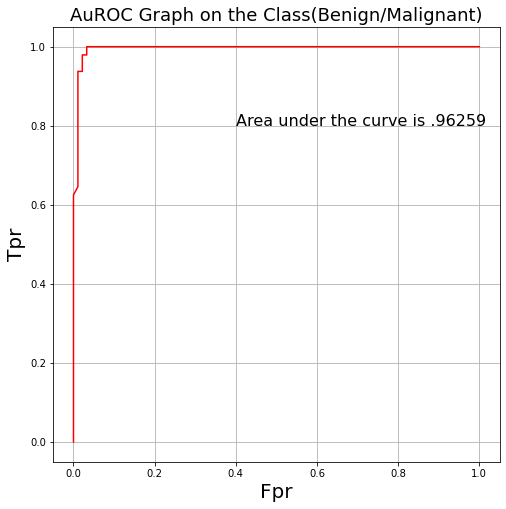

In [38]:
plt.figure(figsize=(8,8))
plt.plot(fpr,tpr,color="r")

plt.xlabel("Fpr",size=20)
plt.ylabel("Tpr",size=20)
plt.title("AuROC Graph on the Class(Benign/Malignant)",size=18)
plt.text(x=0.4,y=0.8,s="Area under the curve is .96259",size=16)
plt.grid()
plt.show()

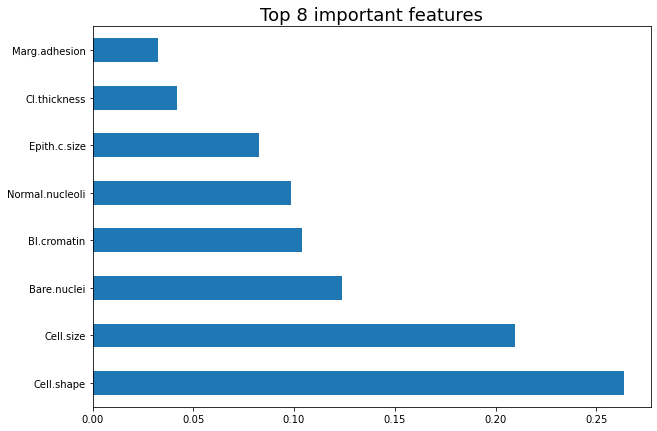

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.title("Top 8 important features",size=18)
feat_imortances=pd.Series(rf.feature_importances_,index=bscan_x_train.columns)
feat_imortances.nlargest(8).plot(kind='barh')

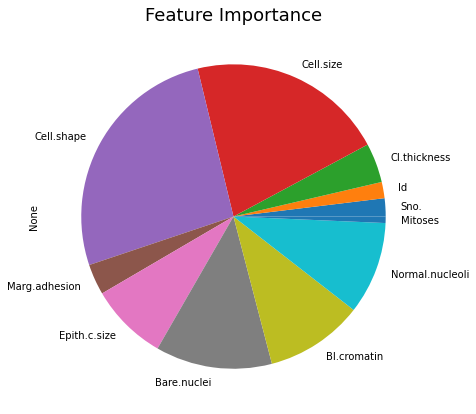

In [46]:
plt.figure(figsize=(10,7))
plt.title("Feature Importance",size=18)
feat_imortances.plot(kind='pie')


In [48]:
# Saving the Model
import pickle

In [49]:
with open("BreastCancer_rf",'wb') as f:
    pickle.dump(rf,f)